In [1]:
import numpy as np

In [2]:
import matplotlib.pylab as plt

In [3]:
import seaborn as sns

In [4]:
# first read the imod transition path data
f2xzpTo2xzo = np.loadtxt("./transitionPath/2xzpTo2xzo")
f2xzpTo2gjk = np.loadtxt("./transitionPath/2xzpTo2gjk")
f2gjkTo2xzo = np.loadtxt("./transitionPath/2gjkTo2xzo")


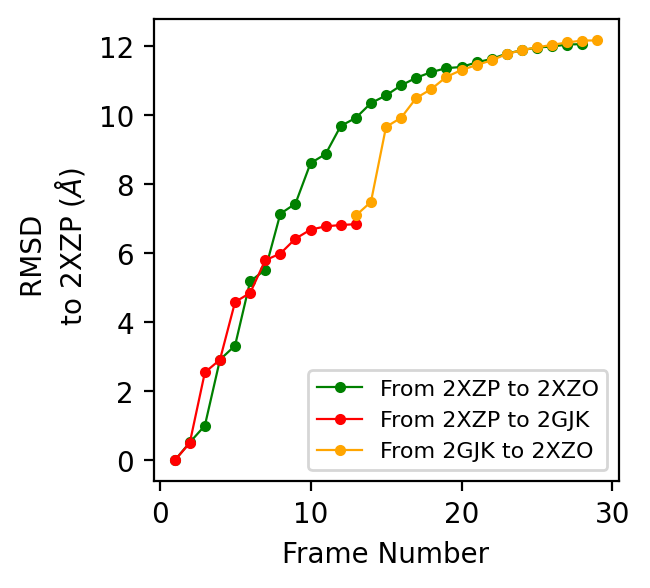

In [5]:
plt.figure(figsize=(3,3),dpi=200)
plt.plot(f2xzpTo2xzo[:,0],f2xzpTo2xzo[:,1],marker=".",color='green',lw=0.8,\
        label='From 2XZP to 2XZO')
plt.plot(f2xzpTo2gjk[:,0],f2xzpTo2gjk[:,1],marker=".",color='red',lw=0.8,\
        label='From 2XZP to 2GJK')
plt.plot(f2gjkTo2xzo[:,0],f2gjkTo2xzo[:,1],marker=".",color='orange',lw=0.8,\
        label='From 2GJK to 2XZO')
plt.xlabel('Frame Number')
plt.ylabel('RMSD \n to 2XZP ($\AA$)')
plt.legend(fontsize=8)

In [6]:
cases = ['Apo','atp','atp-rna-f','atp-rna'] # atp == 2GJK  'atp-rna-f(ake)' == 2GJK + RNA, 'atp-rna' == 2XZO

In [7]:
dataname = ['248-117.dat',  '461-51.dat',  'angle.dat']

In [8]:
data = {i:{} for i in cases}

In [9]:
for i in cases:
    data[i] = {j:np.loadtxt("./cMD/angle-dis/"+str(i)+"/"+str(j), comments="#") for j in dataname}

In [10]:
cc = ['gray','red','blue','green']
labell = ['Apo','ATP','ATP-RNA*','ATP-RNA']

In [11]:
colors = dict(zip(cases,cc))
labells = dict(zip(cases,labell))

In [12]:
print (colors)

{'Apo': 'gray', 'atp': 'red', 'atp-rna-f': 'blue', 'atp-rna': 'green'}


Text(0, 0.5, 'Probability')

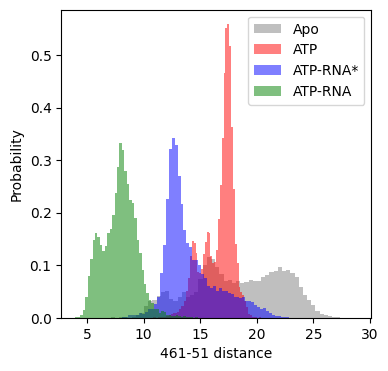

In [13]:
plt.figure(figsize=(4,4))
for i in cases:
    plt.hist(data[i]['461-51.dat'][:,1],density=True,bins=60,color=colors[i],label=labells[i],lw=0.1,alpha=0.5)
plt.legend()
plt.xlabel('461-51 distance')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

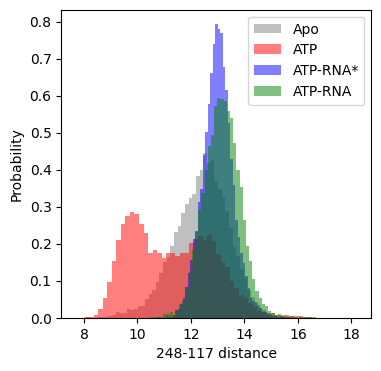

In [14]:
plt.figure(figsize=(4,4))
for i in cases:
    plt.hist(data[i]['248-117.dat'][:,1],density=True,bins=60,color=colors[i],label=labells[i],lw=0.1,alpha=0.5)
plt.legend()
plt.xlabel('248-117 distance')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

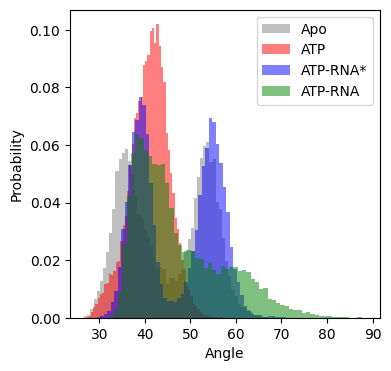

In [15]:
plt.figure(figsize=(4,4))
for i in cases:
    plt.hist(data[i]['angle.dat'][:,1],density=True,bins=60,color=colors[i],label=labells[i],lw=0.1,alpha=0.5)
plt.legend()
plt.xlabel('Angle')
plt.ylabel('Probability')

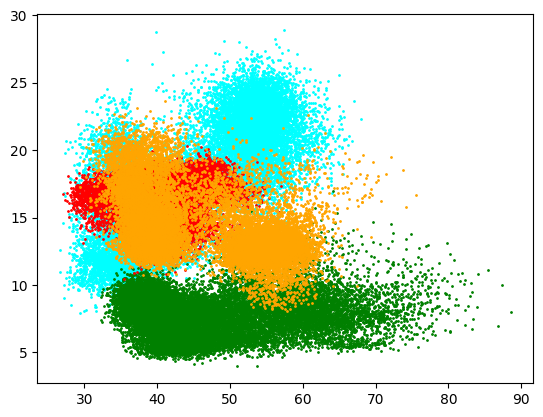

In [16]:
plt.scatter(data['Apo']['angle.dat'][:,1],data['Apo']['461-51.dat'][:,1],s=1,color='cyan')
plt.scatter(data['atp-rna']['angle.dat'][:,1],data['atp-rna']['461-51.dat'][:,1],s=1,color='green')
plt.scatter(data['atp']['angle.dat'][:,1],data['atp']['461-51.dat'][:,1],s=1,color='red')
plt.scatter(data['atp-rna-f']['angle.dat'][:,1],data['atp-rna-f']['461-51.dat'][:,1],s=1,color='orange')

In [17]:
from scipy.stats import gaussian_kde

In [18]:
X, Y = np.mgrid[20:90:40j, 0:30:40j]

In [19]:
positions = np.vstack([X.ravel(), Y.ravel()])


In [20]:
def get_density(xdata,ydata):
    #x_axis=data[:,1]
    #y_axis=data[:,2]
    zdata=np.vstack((xdata,ydata))
    kernel = gaussian_kde(zdata)
    
    Z = np.reshape(kernel(positions).T, X.shape)

    return Z

In [21]:

z1 = get_density(data['Apo']['angle.dat'][:,1],data['Apo']['461-51.dat'][:,1])
z2 = get_density(data['atp']['angle.dat'][:,1],data['atp']['461-51.dat'][:,1])
z3 = get_density(data['atp-rna-f']['angle.dat'][:,1],data['atp-rna-f']['461-51.dat'][:,1])
z4 = get_density(data['atp-rna']['angle.dat'][:,1],data['atp-rna']['461-51.dat'][:,1])


In [22]:
print (np.min(z1),np.max(z1))

0.0 0.010194452798808507


In [23]:
print (np.min(z2),np.max(z2))

0.0 0.0395871081559981


In [24]:
z2[z2<0.005] = 0.0

In [25]:
import matplotlib.patches as mpatches

In [26]:
from matplotlib.lines import Line2D

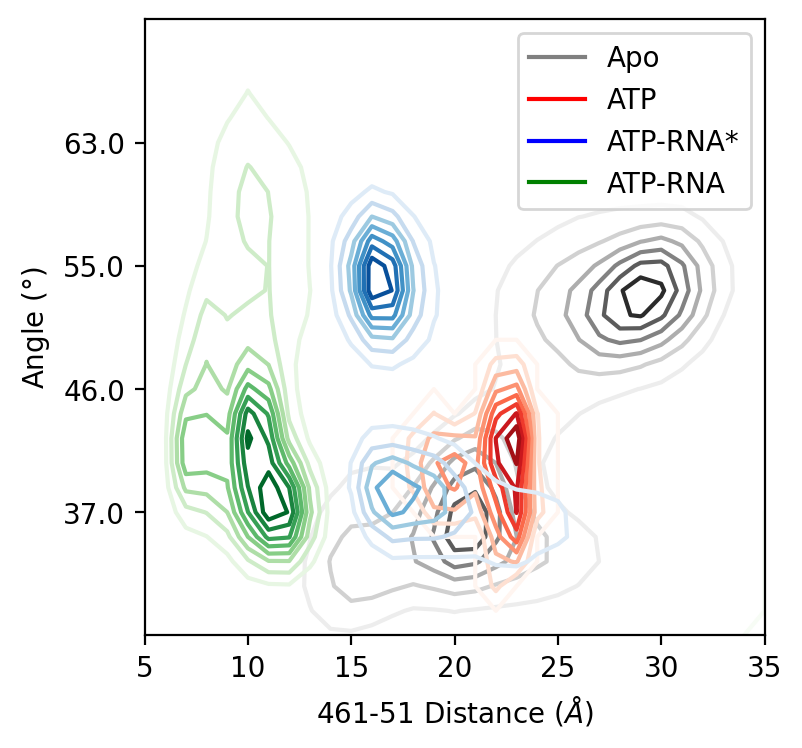

In [27]:
plt.figure(figsize=(4,4),dpi=200)
#ax = plt.subplot(111)
plt.contour(z1,cmap='Greys',levels=8,linewidths=1.5,linestyles='solid')

plt.contour(z2,cmap='Reds',levels=8,linewidths=1.5,linestyles='solid')

plt.contour(z3,cmap='Blues',levels=8,linewidths=1.5,linestyles='solid')
#plt.subplot(3,2,5)
plt.contour(z4,cmap='Greens',levels=8,linewidths=1.5,linestyles='solid')
plt.xlim([5,35])
plt.ylim([5,30])
plt.yticks(np.arange(10,30,5),np.floor(np.arange(10,30,5)*7/4 + 20))
plt.ylabel('Angle ($\degree$)')
plt.xlabel('461-51 Distance ($\AA$)')



#define handles and labels that will get added to legend
handles, labels = plt.gca().get_legend_handles_labels()

#define patches and lines to add to legend
#patch1 = mpatches.Patch(color='Gray', label='Apo')
#patch2 = mpatches.Patch(color='Red', label='ATP')  

line1 = Line2D([0], [0], label='Apo', color='gray')
line2 = Line2D([0], [0], label='ATP', color='red')
line3 = Line2D([0], [0], label='ATP-RNA*', color='blue')
line4 = Line2D([0], [0], label='ATP-RNA', color='green')

#add handles
handles.extend([line1, line2,line3,line4])

#add legend
plt.legend(handles=handles)

#plt.legend(cases)

In [28]:
z1 = get_density(data['Apo']['angle.dat'][:,1],data['Apo']['248-117.dat'][:,1])
z2 = get_density(data['atp']['angle.dat'][:,1],data['atp']['248-117.dat'][:,1])
z3 = get_density(data['atp-rna-f']['angle.dat'][:,1],data['atp-rna-f']['248-117.dat'][:,1])
z4 = get_density(data['atp-rna']['angle.dat'][:,1],data['atp-rna']['248-117.dat'][:,1])

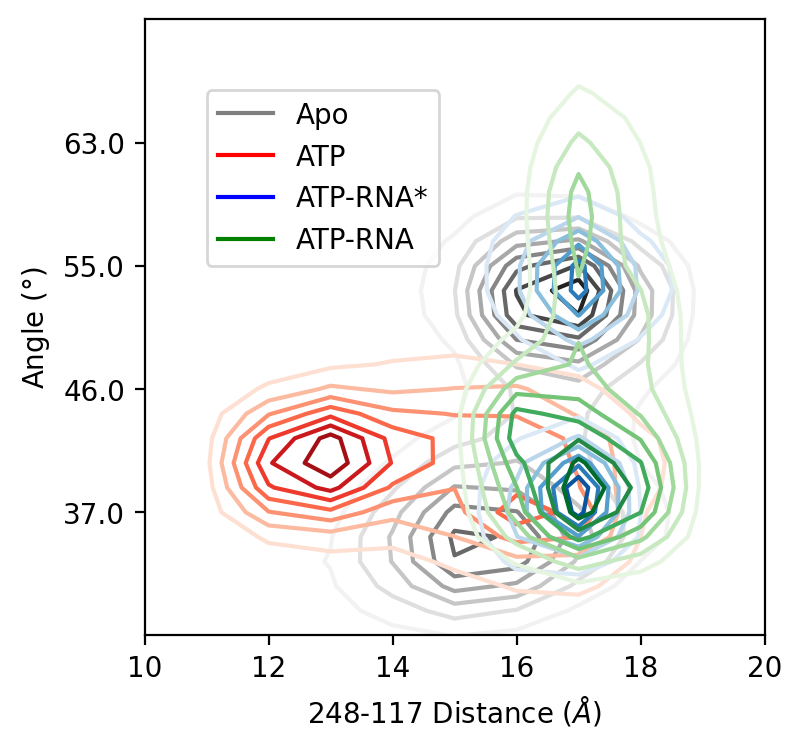

In [29]:
plt.figure(figsize=(4,4),dpi=200)
#ax = plt.subplot(111)
plt.contour(z1,cmap='Greys',levels=8,linewidths=1.5,linestyles='solid')

plt.contour(z2,cmap='Reds',levels=8,linewidths=1.5,linestyles='solid')

plt.contour(z3,cmap='Blues',levels=8,linewidths=1.5,linestyles='solid')
#plt.subplot(3,2,5)
plt.contour(z4,cmap='Greens',levels=8,linewidths=1.5,linestyles='solid')
plt.xlim([10,20])
plt.ylim([5,30])
plt.yticks(np.arange(10,30,5),np.floor(np.arange(10,30,5)*7/4 + 20))
plt.ylabel('Angle ($\degree$)')
plt.xlabel('248-117 Distance ($\AA$)')
plt.legend(handles=handles,loc=[0.1,0.6])

In [30]:
# read in the WISP results
cases = ['Apo','atp','atp-rna-f','atp-rna'] # atp == 2GJK  'atp-rna-f(ake)' == 2GJK + RNA, 'atp-rna' == 2XZO

In [31]:
data = {i:{} for i in cases}

In [32]:
for i in cases:
    data[i] = {j:np.loadtxt("./wisp/Apo/"+str(j)+"/simply_formatted_paths.txt", comments="#") for j in ['199','566']}

ValueError: the number of columns changed from 99 to 101 at row 2; use `usecols` to select a subset and avoid this error

In [33]:
import pandas as pd

In [36]:
names = np.arange(500)

In [37]:
d1 = pd.read_csv("./wisp/Apo/199/simply_formatted_paths.txt", sep=" ", header=None, names=names)

In [52]:
data = {i:{} for i in cases}

In [54]:
for i in cases:
    data[i] = {j:pd.read_csv("./wisp/"+str(i)+"/"+str(j)+"/simply_formatted_paths.txt", sep=" ", header=None, names=names) for j in ['199','566']}

In [42]:
import seaborn as sns

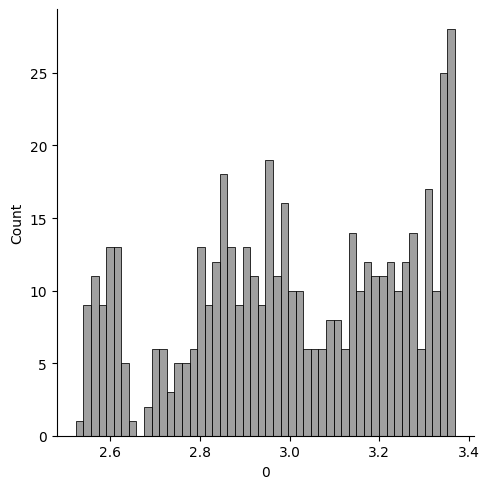

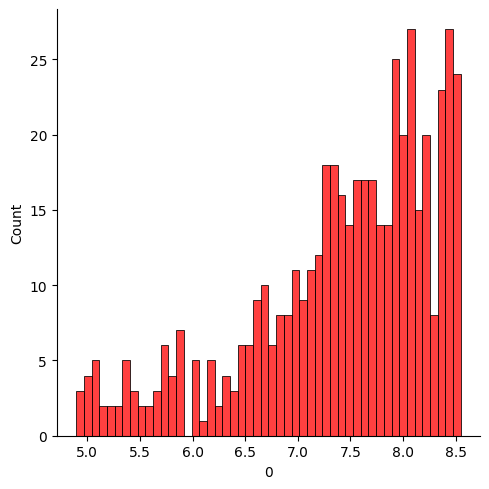

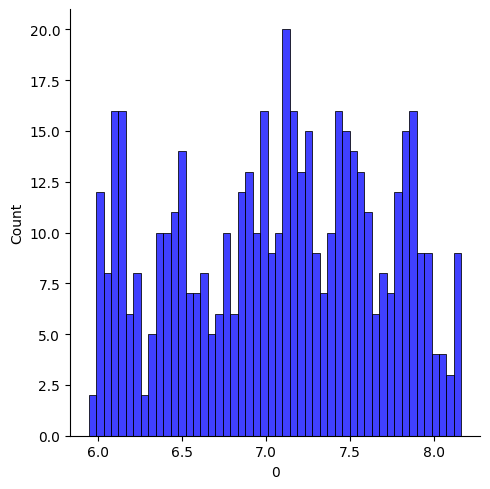

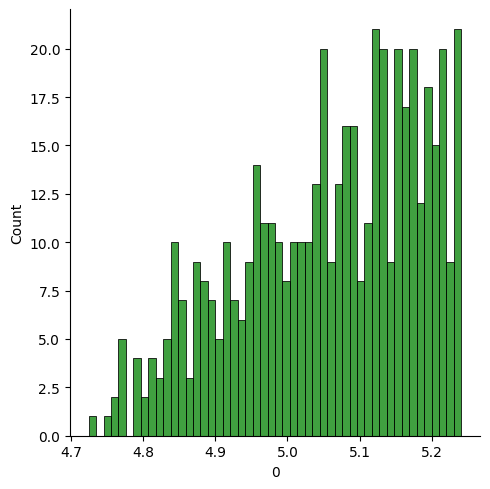

In [55]:
sns.displot(data['Apo']['199'][0],color='gray',bins=50)
sns.displot(data['atp']['199'][0],color='red',bins=50)
sns.displot(data['atp-rna-f']['199'][0],color='blue',bins=50)
sns.displot(data['atp-rna']['199'][0],color='green',bins=50)


In [86]:
sns.set_theme(style="white", rc={"axes.facecolor": (1, 1, 1, 1)})

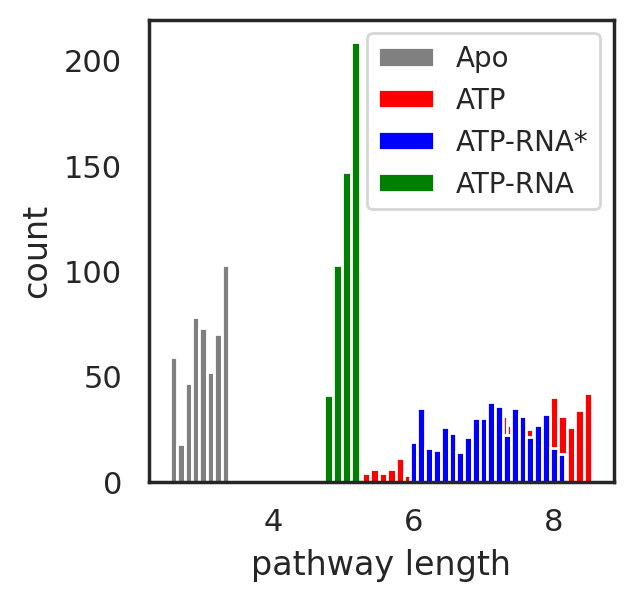

In [131]:
plt.figure(figsize=(3,3),dpi=200)
plt.hist(data['Apo']['199'][0],color='gray',bins=8,label="Apo",)
plt.hist(data['atp']['199'][0],color='red',bins=30,label="ATP")
plt.hist(data['atp-rna-f']['199'][0],color='blue',bins=20,label="ATP-RNA*")
plt.hist(data['atp-rna']['199'][0],color='green',bins=4,label="ATP-RNA")
plt.ylabel('count')
plt.xlabel('pathway length')
plt.legend(fontsize=10)


Text(0.5, 0, 'pathway length')

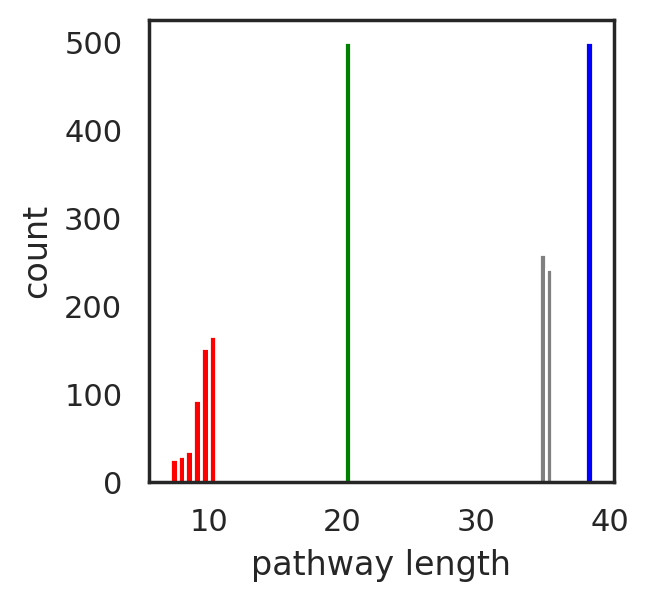

In [141]:
plt.figure(figsize=(3,3),dpi=200)
plt.hist(data['Apo']['566'][0],color='gray',label="Apo",bins=2)
#plt.hist(data['atp']['566'][0],color='red',label="ATP")
plt.hist(data['atp-rna-f']['566'][0],color='blue',label="ATP-RNA*",bins=1)
plt.hist(data['atp']['566'][0],color='red',label="ATP",bins=6)
plt.hist(data['atp-rna']['566'][0],color='green',bins=1,label="ATP-RNA")
plt.ylabel('count')
plt.xlabel('pathway length')

In [110]:
data['atp-rna-f']['566'][0]

0      38.107574
1      38.148113
2      38.152847
3      38.153535
4      38.168976
         ...    
495    38.703726
496    38.703878
497    38.704247
498    38.704414
499    38.705632
Name: 0, Length: 500, dtype: float64